In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

 Set the style for better looking plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load and prepare the data
covid_data = pd.read_csv('owid-covid-data.csv')
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [2]:
print(covid_data.columns)
print(covid_data.head())
print(covid_data.isnull().sum())

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
# Convert date column to datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Select countries of interest (with .copy())
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']
filtered_data = covid_data[covid_data['location'].isin(countries)].copy()  # <-- Fix here

# Handle missing values
cols_to_fill = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
filtered_data[cols_to_fill] = filtered_data[cols_to_fill].fillna(0)

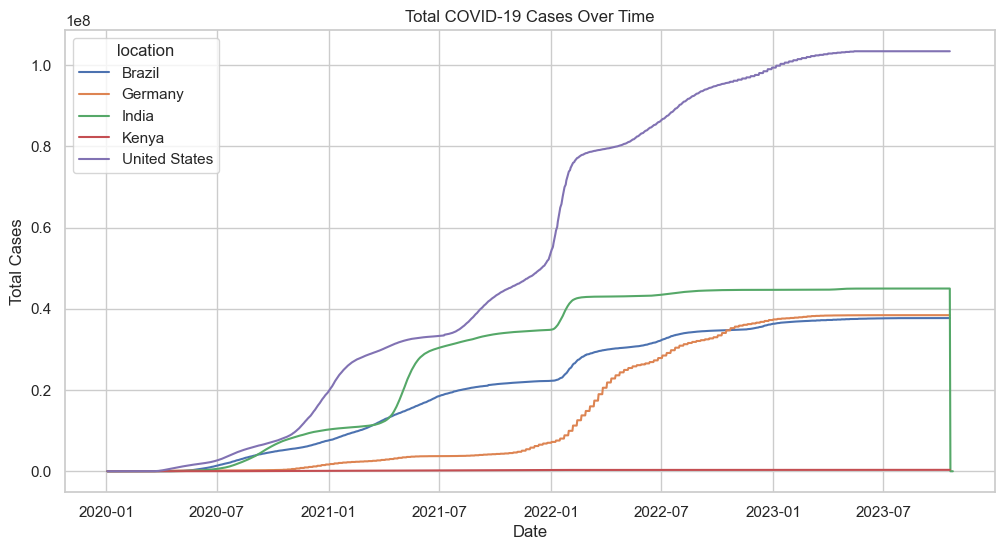

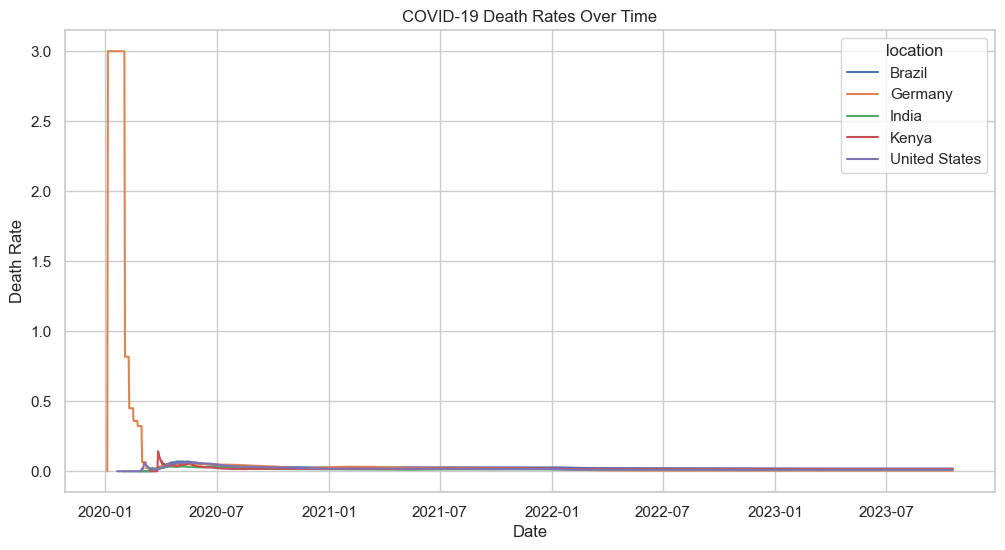

In [8]:
# Plot total cases over time
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_data, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

# Calculate death rate
filtered_data['death_rate'] = filtered_data['total_deaths'] / filtered_data['total_cases']

# Plot death rates
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_data, x='date', y='death_rate', hue='location')
plt.title('COVID-19 Death Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.show()

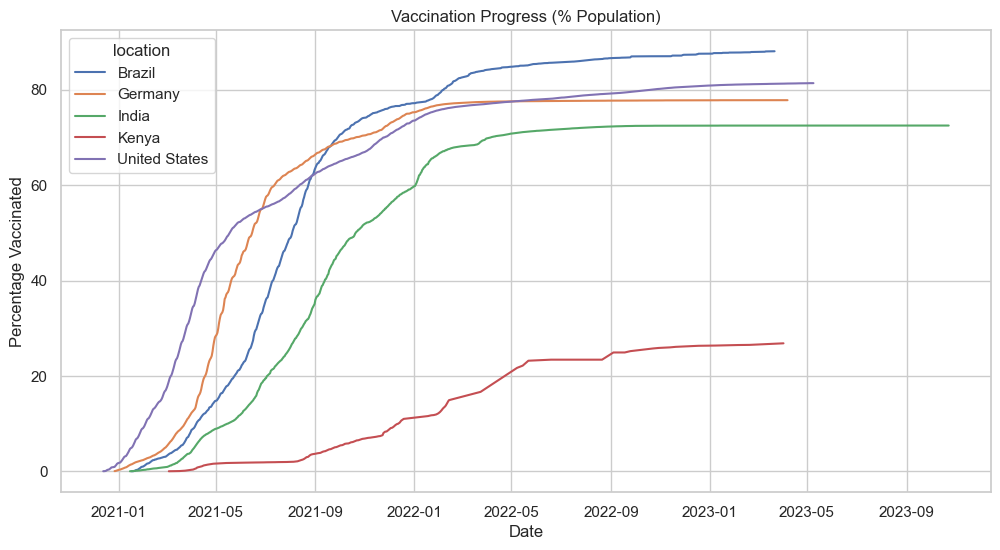

In [9]:
# Plot vaccination progress
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_data, x='date', y='people_vaccinated_per_hundred', hue='location')
plt.title('Vaccination Progress (% Population)')
plt.xlabel('Date')
plt.ylabel('Percentage Vaccinated')
plt.show()

In [1]:
try:
    import plotly.express as px
    import pandas as pd
    from IPython.display import display
    
    # Load and prepare data
    covid_data = pd.read_csv('owid-covid-data.csv')
    covid_data['date'] = pd.to_datetime(covid_data['date'])
    latest_data = covid_data[covid_data['date'] == covid_data['date'].max()]
    latest_data = latest_data.dropna(subset=['iso_code', 'total_cases_per_million'])
    
    # Create figure
    fig = px.choropleth(latest_data,
                        locations="iso_code",
                        color="total_cases_per_million",
                        hover_name="location",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title="Global COVID-19 Cases per Million")
    
    # Handle rendering
    try:
        fig.show()
    except Exception as e:
        print(f"Interactive display failed: {str(e)}")
        print("Saving as HTML instead...")
        fig.write_html("covid_fallback.html")
        print("Map saved to covid_fallback.html")
        
except ImportError as e:
    print(f"Error: {str(e)}")
    print("Try running: !pip install plotly nbformat>=4.2.0")